In [406]:
import sys
import subprocess
import pkg_resources

required = {'pandas_profiling'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

In [407]:
import pandas as pd
import numpy as np
import os
from pandas_profiling import ProfileReport
from functools import partialmethod
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# ML model Libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import warnings
warnings.filterwarnings('ignore')

pd.DataFrame.head = partialmethod(pd.DataFrame.head, n=20)

What we need to predict in this dataset is whether the rider is still active or not active. Active if the rider has used the service in the past 30 days.
<br><br><br>
Surge Pricing: The practice of tripling, quadrupling and quintupling ride fares in times of high demand. Alternately, the more demand there is, the higher the surge. So the fare can be anything from double the original price, which “The Surge” denotes as 2x, to eight times the original fare, or 8x.
<br><br>
Sign up dates are only in the month of jan

In [408]:
ultimate_data = pd.read_json(os.getcwd()+'\\ultimate_data_challenge.json')

Data description<br><br>
-> city: city this user signed up in<br>
-> phone: primary device for this user<br>
-> signup_date: date of account registration; in the form ‘YYYY MM DD’<br>
-> last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’<br>
-> avg_dist: the average distance in miles per trip taken in the first 30 days after signup<br>
-> avg_rating_by_driver: the rider’s average rating over all of their trips<br>
-> avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips<br>
-> surge_pct: the percent of trips taken with surge multiplier > 1<br>
-> avg_surge: The average surge multiplier over all of this user’s trips<br>
-> trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up<br>
-> ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise<br>
-> weekday_pct: the percent of the user’s trips occurring during a weekday<br>

In [409]:
#profile = ProfileReport(untimate_data, title='Pandas Profiling Report', explorative=True)
#profile.to_file("ultimate_technologies_initial_report.html")

# ultimate_data_surge_pct_not_zero = ultimate_data[ultimate_data['surge_pct'] != 0]
# ultimate_data_surge_pct_not_zero_profile = ProfileReport(ultimate_data_surge_pct_not_zero, title='Pandas Profiling Report', explorative=True)
# ultimate_data_surge_pct_not_zero_profile.to_notebook_iframe()

# surge_pct_100 = ultimate_data[ultimate_data['surge_pct'] == 100]
# surge_pct_100_profile = ProfileReport(surge_pct_100, title='Pandas Profiling Report', explorative=True)
# surge_pct_100_profile.to_notebook_iframe()

In [410]:
ultimate_data['signup_date'] = pd.to_datetime(ultimate_data['signup_date'])
ultimate_data.set_index('signup_date',inplace=True)
ultimate_data.sort_index(inplace=True)
ultimate_data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
signup_date,,,,,,,,,,,
2014-01-01,Astapor,2,NaN,1.00,2014-06-28,iPhone,0.0,False,0.0,4.03,4.0
2014-01-01,Winterfell,1,NaN,1.00,2014-01-01,iPhone,0.0,True,100.0,3.39,5.0
2014-01-01,Winterfell,0,NaN,1.00,2014-06-08,iPhone,0.0,True,66.7,9.76,5.0
2014-01-01,Winterfell,2,5.0,1.00,2014-06-20,Android,0.0,False,54.5,5.03,4.7
2014-01-01,Winterfell,0,3.0,1.50,2014-05-18,iPhone,100.0,False,0.0,3.28,5.0
2014-01-01,Astapor,7,4.9,1.00,2014-01-03,Android,0.0,False,100.0,3.39,4.6
2014-01-01,Astapor,0,5.0,1.00,2014-05-06,iPhone,0.0,True,100.0,6.27,5.0
2014-01-01,Winterfell,7,4.9,1.00,2014-06-17,iPhone,0.0,True,77.3,4.86,4.6
2014-01-01,King's Landing,1,4.9,1.00,2014-06-15,iPhone,0.0,False,80.0,4.52,4.6


In [411]:
# Handling NaN values
# avg_rating_of_driver (less than 9000 missing values)
# this fillna can be handled differently, groupby city / group by signups and calculate mean
ultimate_data['avg_rating_of_driver'].fillna(round(ultimate_data['avg_rating_of_driver'].mean(),1), inplace=True)
# phone - iphone seems to be more probable than android with 34582 iphones and 15022 androids (less than 500 missing values)
ultimate_data['phone'].fillna('iPhone',inplace=True)
# avg_rating_by_driver (less than 300 missing values)
ultimate_data['avg_rating_by_driver'].fillna(round(ultimate_data['avg_rating_by_driver'].mean(),1), inplace=True)

In [412]:
ultimate_data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
signup_date,,,,,,,,,,,
2014-01-01,Astapor,2,4.6,1.00,2014-06-28,iPhone,0.0,False,0.0,4.03,4.0
2014-01-01,Winterfell,1,4.6,1.00,2014-01-01,iPhone,0.0,True,100.0,3.39,5.0
2014-01-01,Winterfell,0,4.6,1.00,2014-06-08,iPhone,0.0,True,66.7,9.76,5.0
2014-01-01,Winterfell,2,5.0,1.00,2014-06-20,Android,0.0,False,54.5,5.03,4.7
2014-01-01,Winterfell,0,3.0,1.50,2014-05-18,iPhone,100.0,False,0.0,3.28,5.0
2014-01-01,Astapor,7,4.9,1.00,2014-01-03,Android,0.0,False,100.0,3.39,4.6
2014-01-01,Astapor,0,5.0,1.00,2014-05-06,iPhone,0.0,True,100.0,6.27,5.0
2014-01-01,Winterfell,7,4.9,1.00,2014-06-17,iPhone,0.0,True,77.3,4.86,4.6
2014-01-01,King's Landing,1,4.9,1.00,2014-06-15,iPhone,0.0,False,80.0,4.52,4.6


In [413]:
#creating retained column
ultimate_data['last_trip_date'] = pd.to_datetime(ultimate_data['last_trip_date'])
retained_after_this_date = ultimate_data['last_trip_date'].max() - pd.Timedelta('30 days')
ultimate_data['retained'] = (ultimate_data['last_trip_date'] > retained_after_this_date)
percentage_of_retained = 100*ultimate_data.loc[ultimate_data['retained']==True,'retained'].value_counts().values/len(ultimate_data['retained'])
print('Retained Percentage : {}'.format(percentage_of_retained[0]))

ultimate_data['last_trip_month'] = ultimate_data['last_trip_date'].apply(lambda x: x.strftime('%m')).astype('int')
ultimate_data['last_trip_day'] =  ultimate_data['last_trip_date'].apply(lambda x: x.strftime('%d')).astype('int')
ultimate_data['last_trip_month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul'},inplace=True)

def substitute(d):
    if d <= 7:
        return 'MQ1'
    elif (d <= 14):
        return 'MQ2'
    elif (d <= 21):
        return 'MQ3'
    else:
        return 'MQ4'
    
ultimate_data['last_trip_day'] = ultimate_data['last_trip_day'].apply(lambda x: substitute(x))
#ultimate_data['last_trip_day'].replace({1:'MQ1',8:'MQ2',15:'MQ3',22:'MQ4'}, inplace=True)

ultimate_data.reset_index(inplace=True)
ultimate_data['signup_date'] =  ultimate_data['signup_date'].apply(lambda x: x.strftime('%d')).astype('int') #removed the month and year from data because its Jan and 2014 by default
ultimate_data['signup_date'] = ultimate_data['signup_date'].apply(lambda x: substitute(x))
#ultimate_data['signup_date'].replace({1:'MQ1',8:'MQ2',15:'MQ3',22:'MQ4'}, inplace=True)

ultimate_data.drop(columns=['last_trip_date'],inplace=True)
ultimate_data.head()

Retained Percentage : 36.62


,signup_date,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,last_trip_month,last_trip_day
0,MQ1,Astapor,2,4.6,1.00,iPhone,0.0,False,0.0,4.03,4.0,True,Jun,MQ4
1,MQ1,Winterfell,1,4.6,1.00,iPhone,0.0,True,100.0,3.39,5.0,False,Jan,MQ1
2,MQ1,Winterfell,0,4.6,1.00,iPhone,0.0,True,66.7,9.76,5.0,True,Jun,MQ2
3,MQ1,Winterfell,2,5.0,1.00,Android,0.0,False,54.5,5.03,4.7,True,Jun,MQ3
4,MQ1,Winterfell,0,3.0,1.50,iPhone,100.0,False,0.0,3.28,5.0,False,May,MQ3
5,MQ1,Astapor,7,4.9,1.00,Android,0.0,False,100.0,3.39,4.6,False,Jan,MQ1
6,MQ1,Astapor,0,5.0,1.00,iPhone,0.0,True,100.0,6.27,5.0,False,May,MQ1
7,MQ1,Winterfell,7,4.9,1.00,iPhone,0.0,True,77.3,4.86,4.6,True,Jun,MQ3
8,MQ1,King's Landing,1,4.9,1.00,iPhone,0.0,False,80.0,4.52,4.6,True,Jun,MQ3
9,MQ1,Astapor,0,5.0,1.00,iPhone,0.0,True,100.0,2.84,5.0,False,Mar,MQ3


<AxesSubplot:>

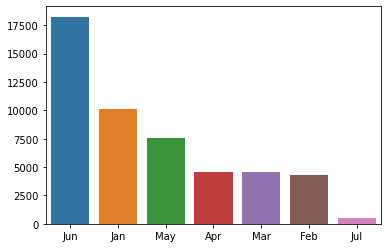

In [414]:
last_trip_month = ultimate_data['last_trip_month'].value_counts()
sns.barplot(x=last_trip_month.index,y=last_trip_month.values)

#signup month Jan and Jun has seen the maximum last trip.

In [415]:
# #retained alone analysis
# retained_users = ultimate_data[ultimate_data['retained'] == True]
# retained_users_profile = ProfileReport(retained_users, title='Pandas Profiling Report', explorative=True)
# retained_users_profile.to_notebook_iframe()

Insights :<br>
1. The most suprising fact is that most of the retained users have made their last trip in the fourth quater of the month JUNE. This is a very interesting find. Over 52% of the retained customers have made their last trip in the fourth quater of JUNE. Since, we are modeling based on the idea that the customers are retained if they made a trip in the last 30days, the peak in this quater of the month needs to be confirmed that its not an anomaly, like say a special event in the city which increased the usage. If the peak is because of an anomaly, the model would fail to predict future events if the "special event" is not added as a parameter in the model.
<br>
2. More than 60% of the retained users are comfortable traveling with a week day surge greater than 50%. So, there isn't a problem with the current pricing for the customers. <br>
3. Almost 50% of the ultimate black users are retained customers, compared to 28.7% of Non-Black users being in the retained group. Which means subscribing to ultimate black is having a significant impact the retainment of users.<br>
4. Average surge is very close to 1 with a few outliers with max surge of 4.5. This outlier can be dropped for the purpose of modeling.<br>
5. More than 92% of the retained users have rated their drivers 4 and above.<br>
6. Almost 97% of the retained users have received a rating of 4 and above from the drivers. So here the customer-driver rapport seems to be good. <br>
7. Almost 30% of the users didn't use the service in the first 30 days of the signup(This is a concerning factor! Why have the users not used the service not even once for 30 days after signup?). Over 31% have used it 1 or 2 times. Almost 40% of the retained users have used the service 3 or more times in their first 30 days of sign up.<br>
8. Interestingly King's Landing has seen a higher proportion of retainers compared to other two cities. Could be interpreted as though the app is popular in King's landing compared to Astapor & Winterfell.<br>
9. There dosen't seem to be any significant correlation between the features so all of them can be used as a unique feature as each feature is adding a unique dimension to the modeling.<br>

In [416]:
retained_weekday_pct_greater_than_50 = ultimate_data.loc[ultimate_data['weekday_pct']>50,'weekday_pct']
percentage_retained_weekday_pct_greater_than_50 =100*len(retained_weekday_pct_greater_than_50)/len(ultimate_data['retained'])
print('Retained Percentage : {}'.format(percentage_retained_weekday_pct_greater_than_50))

Retained Percentage : 60.414


In [417]:
average_Rating_of_driver_above_4 = ultimate_data.loc[ultimate_data['avg_rating_of_driver']>=4,'avg_rating_of_driver']
percentage_average_Rating_of_driver_above_4 =100*len(average_Rating_of_driver_above_4)/len(ultimate_data['retained'])
print('Retained Percentage : {}'.format(percentage_average_Rating_of_driver_above_4))

Retained Percentage : 92.376


In [418]:
avg_rating_by_driver_above_4 = ultimate_data.loc[ultimate_data['avg_rating_by_driver']>=4,'avg_rating_by_driver']
percentage_avg_rating_by_driver_above_4 =100*len(avg_rating_by_driver_above_4)/len(ultimate_data['retained'])
print('Retained Percentage : {}'.format(percentage_avg_rating_by_driver_above_4))

Retained Percentage : 96.862


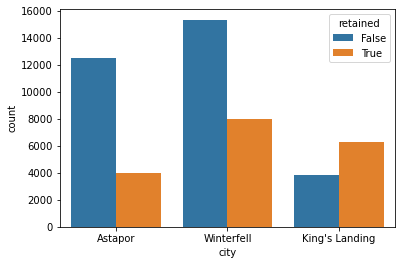

In [419]:
# correlation between city and retained
sns.countplot(x='city', data=ultimate_data, hue='retained');

<AxesSubplot:>

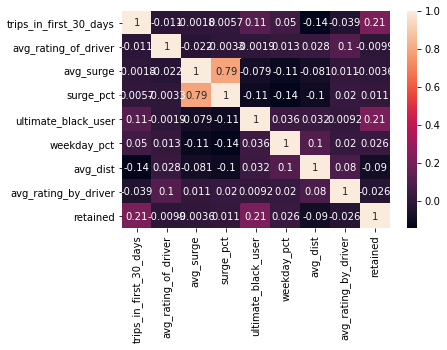

In [420]:
sns.heatmap(ultimate_data.corr(),annot=True)

<AxesSubplot:>

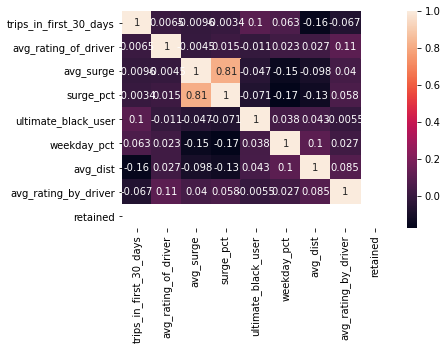

In [421]:
sns.heatmap(ultimate_data[ultimate_data['retained']==True].corr(),annot=True)

<Figure size 1440x360 with 0 Axes>

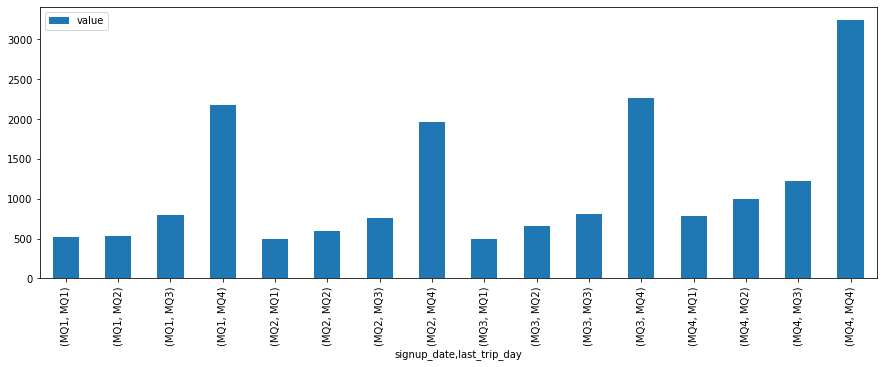

In [422]:
#quater-quater comparision. Its highly unlikely that there will be a pattern here
sup_corr_lst_date = ultimate_data.loc[ultimate_data['retained']==True,['signup_date','last_trip_day']]
sup_corr_lst_date['value'] = 1
plt.figure(figsize=(20,5))
fig = sup_corr_lst_date.pivot_table(index=['signup_date','last_trip_day'],aggfunc='count').plot(kind='bar',figsize=(15,5))
plt.show()
#was just curious how this would look like, no surprise here!

### Feature Selection<br><br>

Categorical Variables (4 variables)<br>
city, sign_up_date (Binned to quater), last_trip_day(Binned to quater from last_trip_date), last_trip_month<br><br>

Boolean (2 variables)
phone(boolean), ultimate_black_user(boolean)<br>

Numerical Variables (7 variables)<br>
trips_in_first_30_days(binned into 5 categories), avg_rating_of_driver, avg_surge, surge_pct, weekday_pct, avg_dist, avg_rating_by_driver<br>

Prediction Variable
retained

In [423]:
def f30_substitute(x):
    if x<=5:
        return 'bin1'
    elif x<=10:
        return 'bin2'
    elif x<=15:
        return 'bin3'
    elif x<=20:
        return 'bin4'
    else:
        return 'bin5'
    
ultimate_data['trips_in_first_30_days'] = ultimate_data['trips_in_first_30_days'].apply(lambda x:f30_substitute(x))
ultimate_data['city'].replace({'Astapor':'A','Winterfell':'W',"King's Landing":'K'},inplace=True)
ultimate_data['phone'] = ultimate_data['phone'].apply(lambda x: 1 if x=="iPhone" else 0)
ultimate_data['retained'] = ultimate_data['retained']*1
ultimate_data['ultimate_black_user'] = ultimate_data['ultimate_black_user']*1

#I am suprised that avg_rating_of_driver & avg_rating_by_driver is not correlated. If they were then we could have combined them into one feature called customer-driver rapport.
ultimate_data.head()

,signup_date,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,last_trip_month,last_trip_day
0,MQ1,A,bin1,4.6,1.00,1,0.0,0,0.0,4.03,4.0,1,Jun,MQ4
1,MQ1,W,bin1,4.6,1.00,1,0.0,1,100.0,3.39,5.0,0,Jan,MQ1
2,MQ1,W,bin1,4.6,1.00,1,0.0,1,66.7,9.76,5.0,1,Jun,MQ2
3,MQ1,W,bin1,5.0,1.00,0,0.0,0,54.5,5.03,4.7,1,Jun,MQ3
4,MQ1,W,bin1,3.0,1.50,1,100.0,0,0.0,3.28,5.0,0,May,MQ3
5,MQ1,A,bin2,4.9,1.00,0,0.0,0,100.0,3.39,4.6,0,Jan,MQ1
6,MQ1,A,bin1,5.0,1.00,1,0.0,1,100.0,6.27,5.0,0,May,MQ1
7,MQ1,W,bin2,4.9,1.00,1,0.0,1,77.3,4.86,4.6,1,Jun,MQ3
8,MQ1,K,bin1,4.9,1.00,1,0.0,0,80.0,4.52,4.6,1,Jun,MQ3
9,MQ1,A,bin1,5.0,1.00,1,0.0,1,100.0,2.84,5.0,0,Mar,MQ3


In [424]:


numerical_columns = ['avg_rating_of_driver', 'avg_surge', 'surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']
udnc = ultimate_data[numerical_columns]
min_max_scaler = preprocessing.MinMaxScaler()
udnc_scaled = min_max_scaler.fit_transform(udnc)
ultimate_data[numerical_columns] = pd.DataFrame(udnc_scaled)

In [425]:
 #We use this column to generate retained in the first place, using this would obviously will result in good results. but what we need is to find if we can predict using other factors
ultimate_data.drop(columns=['last_trip_month','last_trip_day'],inplace=True)

In [427]:
category_features = ['signup_date','city','trips_in_first_30_days']
ultimate_data = pd.get_dummies(ultimate_data,columns=category_features)

In [428]:
#let look at the data one last time! Then its ready for modeling
ultimate_data.head()

,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,signup_date_MQ1,...,signup_date_MQ3,signup_date_MQ4,city_A,city_K,city_W,trips_in_first_30_days_bin1,trips_in_first_30_days_bin2,trips_in_first_30_days_bin3,trips_in_first_30_days_bin4,trips_in_first_30_days_bin5
0,0.900,0.000000,1,0.000,0,0.000,0.025037,0.750,1,1,...,0,0,1,0,0,1,0,0,0,0
1,0.900,0.000000,1,0.000,1,1.000,0.021061,1.000,0,1,...,0,0,0,0,1,1,0,0,0,0
2,0.900,0.000000,1,0.000,1,0.667,0.060636,1.000,1,1,...,0,0,0,0,1,1,0,0,0,0
3,1.000,0.000000,0,0.000,0,0.545,0.031250,0.925,1,1,...,0,0,0,0,1,1,0,0,0,0
4,0.500,0.071429,1,1.000,0,0.000,0.020378,1.000,0,1,...,0,0,0,0,1,1,0,0,0,0
5,0.975,0.000000,0,0.000,0,1.000,0.021061,0.900,0,1,...,0,0,1,0,0,0,1,0,0,0
6,1.000,0.000000,1,0.000,1,1.000,0.038954,1.000,0,1,...,0,0,1,0,0,1,0,0,0,0
7,0.975,0.000000,1,0.000,1,0.773,0.030194,0.900,1,1,...,0,0,0,0,1,0,1,0,0,0
8,0.975,0.000000,1,0.000,0,0.800,0.028082,0.900,1,1,...,0,0,0,1,0,1,0,0,0,0
9,1.000,0.000000,1,0.000,1,1.000,0.017644,1.000,0,1,...,0,0,1,0,0,1,0,0,0,0


### Modeling

In [429]:

X = ultimate_data.drop(columns=['retained'])
y = ultimate_data['retained']


In [430]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [431]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print('Accuracy Score : %f' % (accuracy_score(y_pred, y_test)))
parameters = {'C':[0.001, 0.1, 1, 10, 100]}
log_gsmodel = GridSearchCV(estimator=log, param_grid = parameters)
log_gsmodel_result = log_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (log_gsmodel_result.best_score_, log_gsmodel_result.best_params_))
print('mean_test_score : %s' % (log_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (log_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(log_gsmodel_result.cv_results_['params']))

Accuracy Score : 0.727467
Best: 0.723629 using {'C': 1}
mean_test_score : [0.69771429 0.72348571 0.72362857 0.7234     0.72345714]
std_test_Score : [0.00521145 0.00614292 0.00632236 0.00686333 0.00694374]
params: [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}]


In [432]:
ds_tree_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42)
ds_tree_entropy.fit(x_train,y_train)
ds_tree_entropy_y_pred = ds_tree_entropy.predict(x_test)
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,ds_tree_entropy_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,ds_tree_entropy_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.6988
Balanced accuracy: 0.676489834705716
Precision score for "Yes" 0.5879805089334055
Precision score for "No" 0.7637170948303204
Recall score for "Yes" 0.5931185144729656
Recall score for "No" 0.7598611549384664


In [433]:
entr_parameters = {'max_depth':[2,3,4,5,6,7]}
dt_entr_gsmodel = GridSearchCV(estimator=ds_tree_entropy, param_grid = entr_parameters)
dt_entr_gsmodel_result = dt_entr_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (dt_entr_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_entr_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_entr_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(dt_entr_gsmodel_result.cv_results_['params']))

Best: 0.771714 using {'max_depth': 7}
mean_test_score : [0.71648571 0.74222857 0.7508     0.75822857 0.76       0.77171429]
std_test_Score : [0.00193486 0.00406237 0.0036181  0.00300286 0.00214761 0.00344993]
params: [{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}]


In [434]:
ds_tree_gini = DecisionTreeClassifier(criterion='gini',random_state=42)
ds_tree_gini.fit(x_train,y_train)
ds_tree_gini_y_pred = ds_tree_gini.predict(x_test)
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,ds_tree_gini_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,ds_tree_gini_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,ds_tree_gini_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,ds_tree_gini_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.6956
Balanced accuracy: 0.673119872522572
Precision score for "Yes" 0.5835888187556357
Precision score for "No" 0.7612903225806451
Recall score for "Yes" 0.589113417076279
Recall score for "No" 0.757126327968865


In [435]:
gini_parameters = {'max_depth':[2,3,4,5,6,7]}
dt_gini_gsmodel = GridSearchCV(estimator=ds_tree_gini, param_grid = gini_parameters)
dt_gini_gsmodel_result = dt_gini_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (dt_gini_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_gini_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_gini_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(dt_gini_gsmodel_result.cv_results_['params']))

Best: 0.771000 using {'max_depth': 7}
mean_test_score : [0.71648571 0.74222857 0.7508     0.76011429 0.76097143 0.771     ]
std_test_Score : [0.00193486 0.00406237 0.0036181  0.00220833 0.0037595  0.00348525]
params: [{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}]


In [436]:
nb = GaussianNB()
nb_result = nb.fit(x_train,y_train)
nb_y_pred = nb.predict(x_test)
print(accuracy_score(nb_y_pred,y_test))

0.7113333333333334


In [437]:
sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=42)
sgd.fit(x_train,y_train)
sgd_y_pred = sgd.predict(x_test)
print(accuracy_score(sgd_y_pred,y_test))

0.7247333333333333


In [438]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_y_pred = knn.predict(x_test)
print(accuracy_score(knn_y_pred,y_test))

0.7486


In [439]:
knn_parameters = {'n_neighbors': range(10,20)}
knn_gsmodel = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = knn_parameters)
knn_gsmodel_result = knn_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (knn_gsmodel_result.best_score_, knn_gsmodel_result.best_params_))
print('mean_test_score : %s' % (knn_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (knn_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(knn_gsmodel_result.cv_results_['params']))

Best: 0.754229 using {'n_neighbors': 19}
mean_test_score : [0.74994286 0.75031429 0.75077143 0.7534     0.75222857 0.75305714
 0.75294286 0.75374286 0.75382857 0.75422857]
std_test_Score : [0.0040934  0.00343499 0.00489114 0.0036482  0.00529505 0.00376081
 0.00459334 0.00481698 0.00420825 0.00534034]
params: [{'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}]


In [440]:
rfm = RandomForestClassifier(n_estimators=20,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)
rfm.fit(x_train,y_train)
rfm_y_pred = rfm.predict(x_test)
print(accuracy_score(rfm_y_pred,y_test))

0.7828666666666667


In [441]:
rfm_parameters = {'n_estimators': [80,90,100]}
rfm_gsmodel = GridSearchCV(estimator=RandomForestClassifier(oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10), param_grid = rfm_parameters)
rfm_gsmodel_result = rfm_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (rfm_gsmodel_result.best_score_, rfm_gsmodel_result.best_params_))
print('mean_test_score : %s' % (rfm_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (rfm_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(rfm_gsmodel_result.cv_results_['params']))

Best: 0.778971 using {'n_estimators': 100}
mean_test_score : [0.77888571 0.7788     0.77897143]
std_test_Score : [0.00454941 0.0045253  0.00434661]
params: [{'n_estimators': 80}, {'n_estimators': 90}, {'n_estimators': 100}]


In [442]:
rfm_gsmodel_result.best_estimator_

RandomForestClassifier(max_features=None, min_samples_leaf=10, n_jobs=1,
                       oob_score=True, random_state=42)

In [443]:
vote_classify = VotingClassifier(estimators=[
    ('log_be', log_gsmodel_result.best_estimator_), # Logistic Regression
    ('dt_entr_be', dt_entr_gsmodel_result.best_estimator_), #Decision tree entropy
    ('dt_gini_be', dt_gini_gsmodel_result.best_estimator_), #Decision tree Gini
    ('nb_be', nb), #Naive bayes
    ('sgd_be', sgd), #Stocastic Gradient Descent
    ('knn_be', knn_gsmodel_result.best_estimator_), #K-nearest Neighbors
    ('rfm_be', rfm_gsmodel_result.best_estimator_)], voting='soft') # Random Forest
vote_classify_model = vote_classify.fit(x_train, y_train)
vote_classify_ypred = vote_classify_model.predict(x_test)
print(accuracy_score(vote_classify_ypred,y_test))

0.7683333333333333


In [444]:
print(confusion_matrix(vote_classify_ypred,y_test))

[[8498 2466]
 [1009 3027]]


In [445]:
print(classification_report(vote_classify_ypred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83     10964
           1       0.55      0.75      0.64      4036

    accuracy                           0.77     15000
   macro avg       0.72      0.76      0.73     15000
weighted avg       0.80      0.77      0.78     15000



In [446]:
fpr, tpr, _ =  roc_curve(y_test,vote_classify_model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr,tpr)

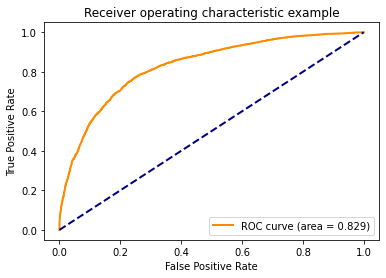

In [447]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

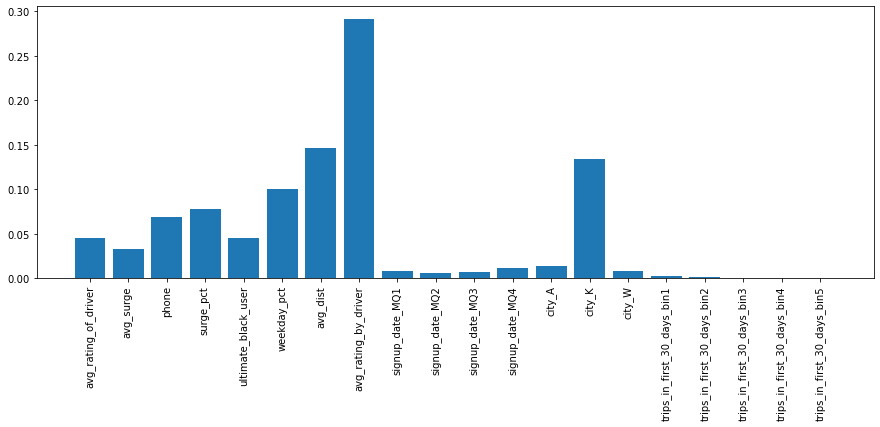

In [448]:
plt.figure(figsize=(15,5))
plt.bar(X.columns,rfm_gsmodel_result.best_estimator_.feature_importances_)
plt.xticks(X.columns,rotation='vertical')
plt.show()

Beyond this gradient boosting techniques and Deep learning can be applied to improve prediction performance.